# **How-To: enumerate molecules from ECFPs**

In this notebook we show how to enumerate molecules from ECFPs.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

from molsig.enumerate_signature import enumerate_molecule_from_morgan
from molsig.SignatureAlphabet import load_alphabet, SignatureAlphabet

## **Importation of an Alphabet**

To perform the enumeration of a molecule, we first need to import a precomputed Alphabet linking ECFPs with atomic signatures. In this notebook we import an Alphabet precomputed with the molecules of the version 4.4 of the MetaNetX database.

To compute an Alphabet from other molecules, we suggest to consult the `creating-alphabet-basics` notebook.

We now load an Alphabet.

In [ ]:
path_alphabet = "YOUR_PATH_HERE"
Alphabet = load_alphabet(path_alphabet, verbose=True)

To illustrate the use of the enumeration algorithm, we initialize an Alphabet as follows (we use the `RDKit`’s version 2024.09.3.):

In [2]:
Alphabet = SignatureAlphabet(radius=2, nBits=2048, use_stereo=True)
Alphabet.Dict = {'1019-1751-1225 ## [C;H0;h0;D3;X3]-[N;H1;h1;D2;X3]-[C;H1;h1;D3;X4:1](-[O;H0;h0;D2;X2]-[c;H0;h0;D3;X3])-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3]',
 '1019-564-759 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H0;h0;D4;X4])(-[Cl;H0;h0;D1;X1])-[C;H1;h1;D3;X4:1](-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4](-[C;H0;h0;D3;X3])(-[C;H1;h1;D3;X4])-[Cl;H0;h0;D1;X1]',
 '1019-761-939 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[Cl;H0;h0;D1;X1])-[C;H1;h1;D3;X4:1](-[C;H0;h0;D4;X4](-[C;H0;h0;D3;X3])(-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2])-[C;H0;h0;D4;X4](-[C;H0;h0;D4;X4])(-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2]',
 '1019-802-1718 ## [C;H0;h0;D4;X4]-[C;H1;h1;D3;X4](-[O;H1;h1;D1;X2])-[C;H1;h1;D3;X4:1](-[C;H1;h1;D2;X3]=[O;H0;h0;D1;X1])-[C;H0;h0;D4;X4](-[C;H0;h0;D4;X4])(-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2]',
 '1019-880-1806 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[O;H1;h1;D1;X2])-[C;H1;h1;D3;X4:1](-[O;H1;h1;D1;X2])-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[C;H1;h1;D2;X3]',
 '1057-841 ## [c;H0;h0;D3;X3]-[O;H0;h0;D2;X2]-[C;H3;h3;D1;X4:1]',
 '1060-1190-1483 ## [C;H0;h0;D4;X4]-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[C;H0;h0;D4;X4:1](-[O;H1;h1;D1;X2])(-[C;H0;h0;D3;X3](-[O;H0;h0;D1;X1;-])=[O;H0;h0;D1;X1])-[C;H1;h1;D3;X4](-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2]',
 '1060-1708-257 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4:1](-[O;H1;h1;D1;X2])(-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[C;H0;h0;D4;X4])-[C;H1;h1;D3;X4](-[C;H1;h1;D2;X3])-[C;H1;h1;D3;X4]',
 '1060-174-422 ## [C;H0;h0;D3;X3]=[C;H0;h0;D3;X3](-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4:1](-[Cl;H0;h0;D1;X1])(-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2]',
 '1060-496-2017 ## [C;H0;h0;D3;X3]=[C;H0;h0;D3;X3](-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4:1](-[Cl;H0;h0;D1;X1])(-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[C;H0;h0;D4;X4])-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[Cl;H0;h0;D1;X1]',
 '1114-301-570 ## [O;H0;h0;D1;X1]=[C;H0;h0;D3;X3](-[c;H0;h0;D3;X3])-[N;H1;h1;D2;X3:1]-[C;H1;h1;D3;X4](-[O;H0;h0;D2;X2])-[c;H0;h0;D3;X3]',
 '1380-1027-105 ## [N;H1;h1;D2;X3]-[C;H1;h1;D3;X4](-[O;H0;h0;D2;X2])-[c;H0;h0;D3;X3:1](:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]):[c;H0;h0;D3;X3](-[O;H0;h0;D2;X2]):[c;H0;h0;D3;X3]',
 '1380-1657-313 ## [C;H1;h1;D3;X4]-[N;H1;h1;D2;X3]-[C;H0;h0;D3;X3:1](=[O;H0;h0;D1;X1])-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3]',
 '1380-1905-245 ## [C;H0;h0;D3;X3]-[c;H0;h0;D3;X3](:[c;H1;h1;D2;X3]):[c;H0;h0;D3;X3:1](-[O;H0;h0;D2;X2]-[C;H1;h1;D3;X4]):[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]',
 '1380-1970-613 ## [C;H3;h3;D1;X4]-[O;H0;h0;D2;X2]-[c;H0;h0;D3;X3:1](:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]):[c;H0;h0;D3;X3](-[O;H0;h0;D2;X2]):[c;H0;h0;D3;X3]',
 '1380-333-1110 ## [C;H1;h1;D3;X4]-[c;H0;h0;D3;X3](:[c;H1;h1;D2;X3]):[c;H0;h0;D3;X3:1](-[O;H0;h0;D2;X2]-[C;H3;h3;D1;X4]):[c;H0;h0;D3;X3](-[O;H0;h0;D2;X2]):[c;H0;h0;D3;X3]',
 '1380-333-899 ## [C;H3;h3;D1;X4]-[O;H0;h0;D2;X2]-[c;H0;h0;D3;X3:1](:[c;H0;h0;D3;X3](-[O;H0;h0;D2;X2]):[c;H0;h0;D3;X3]):[c;H0;h0;D3;X3](-[O;H0;h0;D2;X2]):[c;H1;h1;D2;X3]',
 '1380-352-684 ## [N;H1;h1;D2;X3]-[C;H0;h0;D3;X3](=[O;H0;h0;D1;X1])-[c;H0;h0;D3;X3:1](:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]):[c;H0;h0;D3;X3](-[O;H0;h0;D2;X2]):[c;H1;h1;D2;X3]',
 '1380-668-1930 ## [C;H0;h0;D4;X4]-[C;H0;h0;D3;X3](-[Cl;H0;h0;D1;X1])=[C;H0;h0;D3;X3:1](-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4](-[C;H0;h0;D4;X4])(-[C;H1;h1;D3;X4])-[Cl;H0;h0;D1;X1]',
 '1380-668-469 ## [C;H0;h0;D4;X4]-[C;H0;h0;D3;X3](-[Cl;H0;h0;D1;X1])=[C;H0;h0;D3;X3:1](-[Cl;H0;h0;D1;X1])-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[C;H1;h1;D3;X4])-[Cl;H0;h0;D1;X1]',
 '1683-113 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H0;h0;D4;X4])(-[C;H1;h1;D3;X4])-[Cl;H0;h0;D1;X1:1]',
 '1683-113 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[C;H1;h1;D3;X4])-[Cl;H0;h0;D1;X1:1]',
 '1683-1960 ## [C;H0;h0;D4;X4]-[C;H1;h1;D3;X4](-[C;H0;h0;D4;X4])-[Cl;H0;h0;D1;X1:1]',
 '1683-561 ## [C;H0;h0;D3;X3]=[C;H0;h0;D3;X3](-[C;H0;h0;D4;X4])-[Cl;H0;h0;D1;X1:1]',
 '1873-1088-1199 ## [c;H0;h0;D3;X3]:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3:1]:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]',
 '1873-1750-1039 ## [C;H1;h1;D3;X4]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3:1]:[c;H1;h1;D2;X3]:[c;H0;h0;D3;X3]',
 '1873-1750-1481 ## [O;H0;h0;D2;X2]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3:1]:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]',
 '1873-1750-94 ## [O;H0;h0;D2;X2]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3:1]:[c;H1;h1;D2;X3]:[c;H0;h0;D3;X3]',
 '1873-1750-984 ## [C;H0;h0;D3;X3]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3:1]:[c;H1;h1;D2;X3]:[c;H1;h1;D2;X3]',
 '650-1004 ## [C;H1;h1;D3;X4]-[C;H1;h1;D2;X3]=[O;H0;h0;D1;X1:1]',
 '650-1917 ## [C;H0;h0;D4;X4]-[C;H0;h0;D3;X3](-[O;H0;h0;D1;X1;-])=[O;H0;h0;D1;X1:1]',
 '650-314 ## [N;H1;h1;D2;X3]-[C;H0;h0;D3;X3](-[c;H0;h0;D3;X3])=[O;H0;h0;D1;X1:1]',
 '656-750-1611 ## [N;H1;h1;D2;X3]-[C;H1;h1;D3;X4](-[c;H0;h0;D3;X3])-[O;H0;h0;D2;X2:1]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3]',
 '694-1136-34 ## [C;H0;h0;D4;X4]-[C;H1;h1;D3;X4](-[C;H1;h1;D3;X4])-[C;H1;h1;D2;X3:1]=[O;H0;h0;D1;X1]',
 '695-1536-1599 ## [C;H3;h3;D1;X4]-[O;H0;h0;D2;X2:1]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H0;h0;D3;X3]',
 '695-1536-249 ## [C;H3;h3;D1;X4]-[O;H0;h0;D2;X2:1]-[c;H0;h0;D3;X3](:[c;H0;h0;D3;X3]):[c;H1;h1;D2;X3]',
 '715-1226 ## [C;H0;h0;D4;X4]-[C;H0;h0;D3;X3](=[O;H0;h0;D1;X1])-[O;H0;h0;D1;X1;-:1]',
 '807-1154 ## [C;H0;h0;D3;X3]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2:1]',
 '807-1154 ## [C;H0;h0;D4;X4]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2:1]',
 '807-1257 ## [C;H0;h0;D4;X4]-[C;H1;h1;D3;X4](-[C;H1;h1;D3;X4])-[O;H1;h1;D1;X2:1]',
 '807-1872-755 ## [C;H1;h1;D3;X4]-[C;H0;h0;D4;X4](-[C;H1;h1;D3;X4])(-[O;H1;h1;D1;X2])-[C;H0;h0;D3;X3:1](-[O;H0;h0;D1;X1;-])=[O;H0;h0;D1;X1]'}

## **Fingerprint representation function**

We import from `AllChem` the ECFP representation function and impose the same parameters than the one used when computing the Alphabet.

In [3]:
fpgen = AllChem.GetMorganGenerator(radius=Alphabet.radius, fpSize=Alphabet.nBits, includeChirality=Alphabet.use_stereo)

## **Enumeration of molecules from an ECFP**

In this example we consider the ECFP of the following molecule.

In [4]:
smi = "COc1ccc([C@@H]2NC(=O)c3ccccc3O2)c(OC)c1OC"

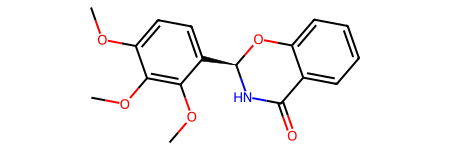

In [5]:
mol = Chem.MolFromSmiles(smi)
mol

We compute its ECFP representation.

In [6]:
morgan = fpgen.GetCountFingerprint(mol).ToList()

We now perform the enumeration of the molecules having the same ECFP than the input ECFP using the `enumerate_molecule_from_morgan` function.

In [7]:
Ssig, Smol, Nsig, thresholds_reached, computational_times = enumerate_molecule_from_morgan(morgan, Alphabet)

We briefly explain the ouputs of the enumeration:

- The set `Smol` is composed of the enumerated molecules.
- The set `Ssig` is composed of the enumerated molecular signatures.
- The integer `Nsig` gives the number of intermediate molecular signatures that gave rise to molecules.
- The list `thresholds_reached` is composed of 3 booleans informing is any threshold has been reached (partition, recursion, stereoisomer thresholds).
- The list `computational_times` is composed of 5 floats giving the computational times of the enumeration steps (enum ecfp to sig, enum sig to mol, enum ecfp to mol, diophantine system solving).

In this example only the original molecule has been found:

In [8]:
Smol

{'COc1ccc([C@@H]2NC(=O)c3ccccc3O2)c(OC)c1OC'}

## **Example producing a lot of molecules**

We now show an example of an ECFP that enumerates a lot of molecules with the same ECFP representation. To that end we import an Alphabet constructed from the MetaNetX database, available on ZENODO_LINK.

In [9]:
path_alphabet = "YOUR_PATH_HERE"
Alphabet = load_alphabet(path_alphabet, verbose=True)

filename: C:/Users/meyerp/Documents/INRAE/Datasets/new/alphabets/metanetx_alphabet.npz
radius: 2
nBits: 2048
use_stereo: True
alphabet length: 227717


We now consider the following molecule:

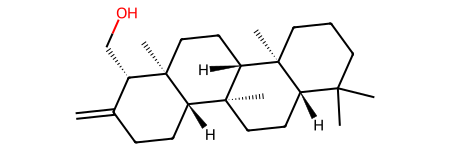

In [10]:
smi = "C=C1CC[C@H]2[C@]3(C)CC[C@H]4C(C)(C)CCC[C@]4(C)[C@H]3CC[C@]2(C)[C@H]1CO"
mol = Chem.MolFromSmiles(smi)
mol

We compute its ECFP vector.

In [11]:
morgan = fpgen.GetCountFingerprint(mol).ToList()

We apply the enumeration on the ECFP and obtain several molecules having the same ECFP representation.

In [12]:
Ssig, Smol, Nsig, thresholds_reached, computational_times = enumerate_molecule_from_morgan(morgan, Alphabet)

In [13]:
Smol

{'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@@]23C)[C@@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@@]23C)[C@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@]23C)[C@@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@]23C)[C@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@]3(C)[C@H]1CO)[C@@H]1CC[C@@]21C',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@]3(C)[C@H]1CO)[C@@H]1CC[C@]21C',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@]3(C)[C@H]1CO)[C@H]1CC[C@@]21C',
 'C=C1CC[C@@H]2[C@@](C)(CCCC(C)(C)[C@@H]3CC[C@]3(C)[C@H]1CO)[C@H]1CC[C@]21C',
 'C=C1CC[C@@H]2[C@@](C)(CC[C@H]3C(C)(C)CCC[C@@]23C)[C@@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CC[C@H]3C(C)(C)CCC[C@@]23C)[C@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CC[C@H]3C(C)(C)CCC[C@]23C)[C@@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@](C)(CC[C@H]3C(C)(C)CCC[C@]23C)[C@H]2CC[C@]2(C)[C@H]1CO',
 'C=C1CC[C@@H]2[C@@]3(C)CCCC(C)(C)[C@@H]4CC[C@@](C)([C@@